# Flight Booking Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv('C:/Users/ASUS/Desktop/Intellipaat/Datasets/Flight_Booking.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# drop 'unnamed:0' column 

df = df.drop(columns = ["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
# checking Missing values in a dataframe

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Data Visualization

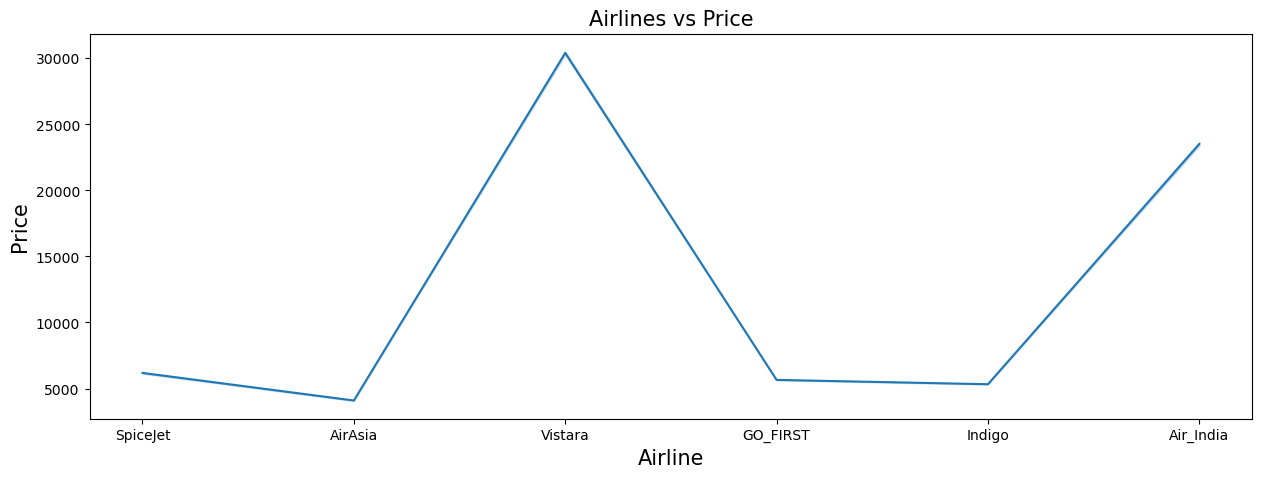

In [9]:
plt.figure(figsize = (15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airlines vs Price', fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

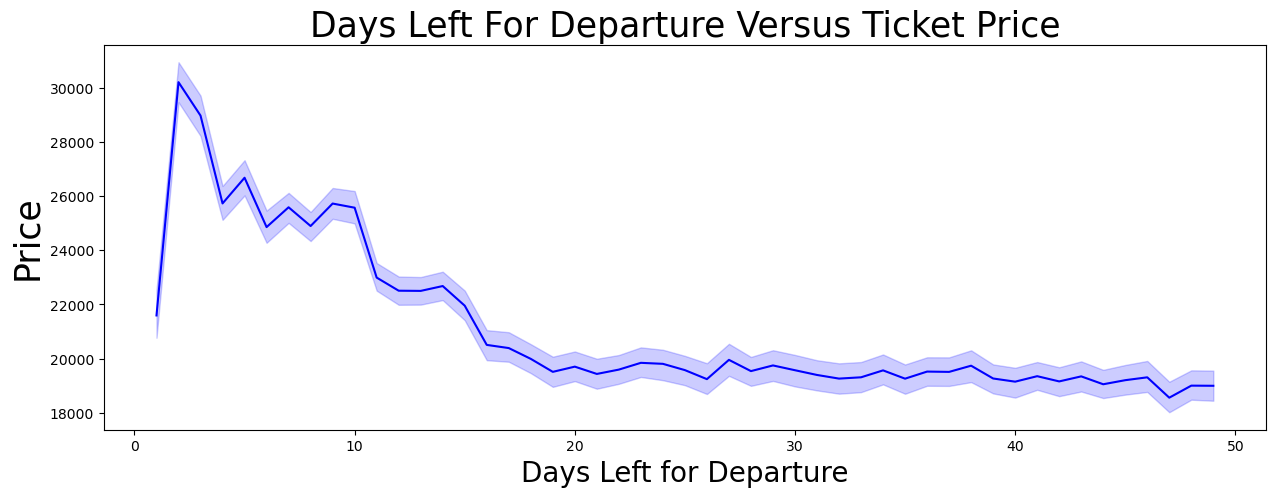

In [10]:
plt.figure(figsize = (15,5))
sns.lineplot(data = df, x = 'days_left', y = 'price', color = 'blue')
plt.title('Days Left For Departure Versus Ticket Price', fontsize = 25)
plt.xlabel('Days Left for Departure', fontsize = 20)
plt.ylabel('Price', fontsize = 25)
plt.show()

<AxesSubplot:xlabel='airline', ylabel='price'>

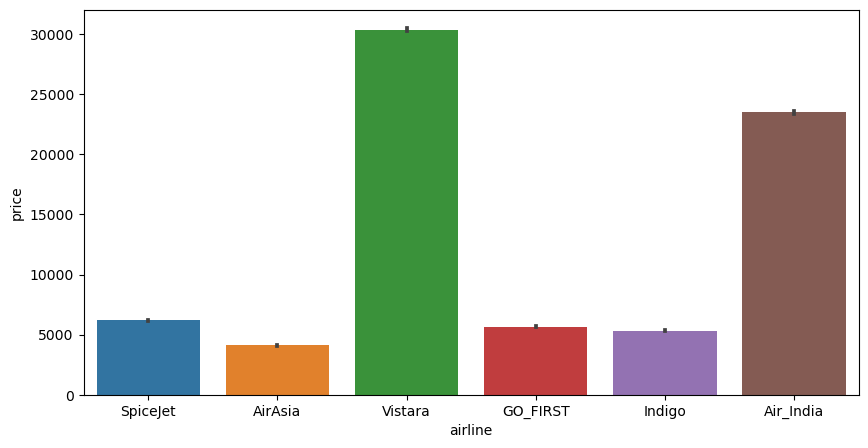

In [11]:
plt.figure(figsize = (10,5));
sns.barplot(x = 'airline', y= 'price', data = df)

<AxesSubplot:xlabel='class', ylabel='price'>

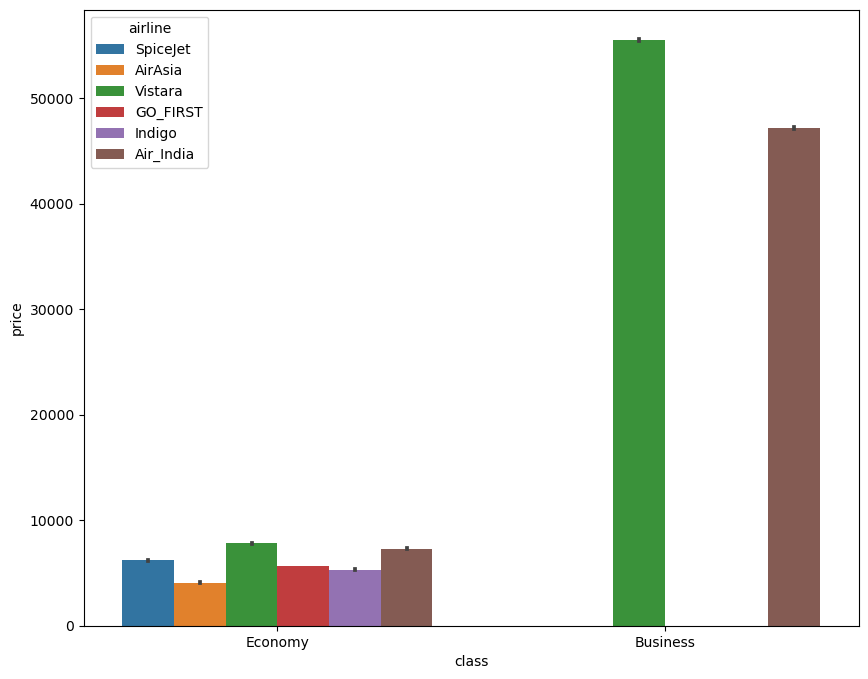

In [12]:
plt.figure(figsize = (10,8));
sns.barplot(x = 'class', y= 'price', data = df, hue = 'airline')

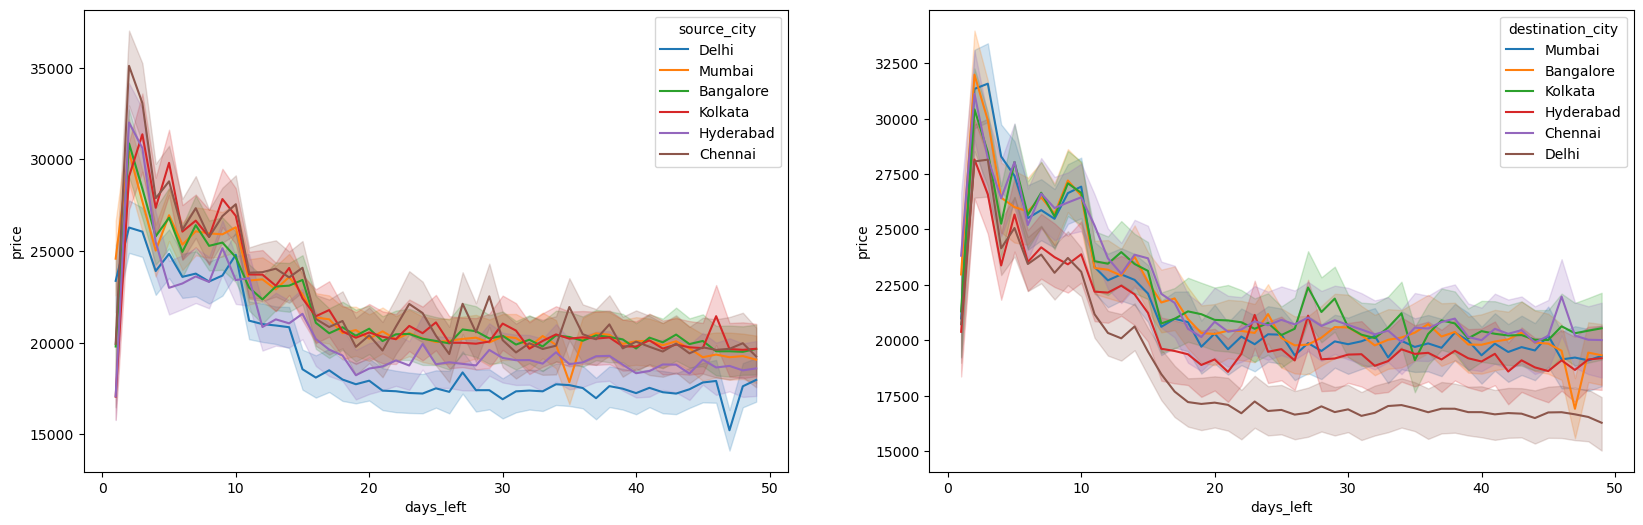

In [13]:
fig, ax = plt.subplots(1,2,figsize = (20,6))
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'source_city', ax = ax[0])
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'destination_city', ax = ax[1])
plt.show()

### Visualization of categorical features with countplot

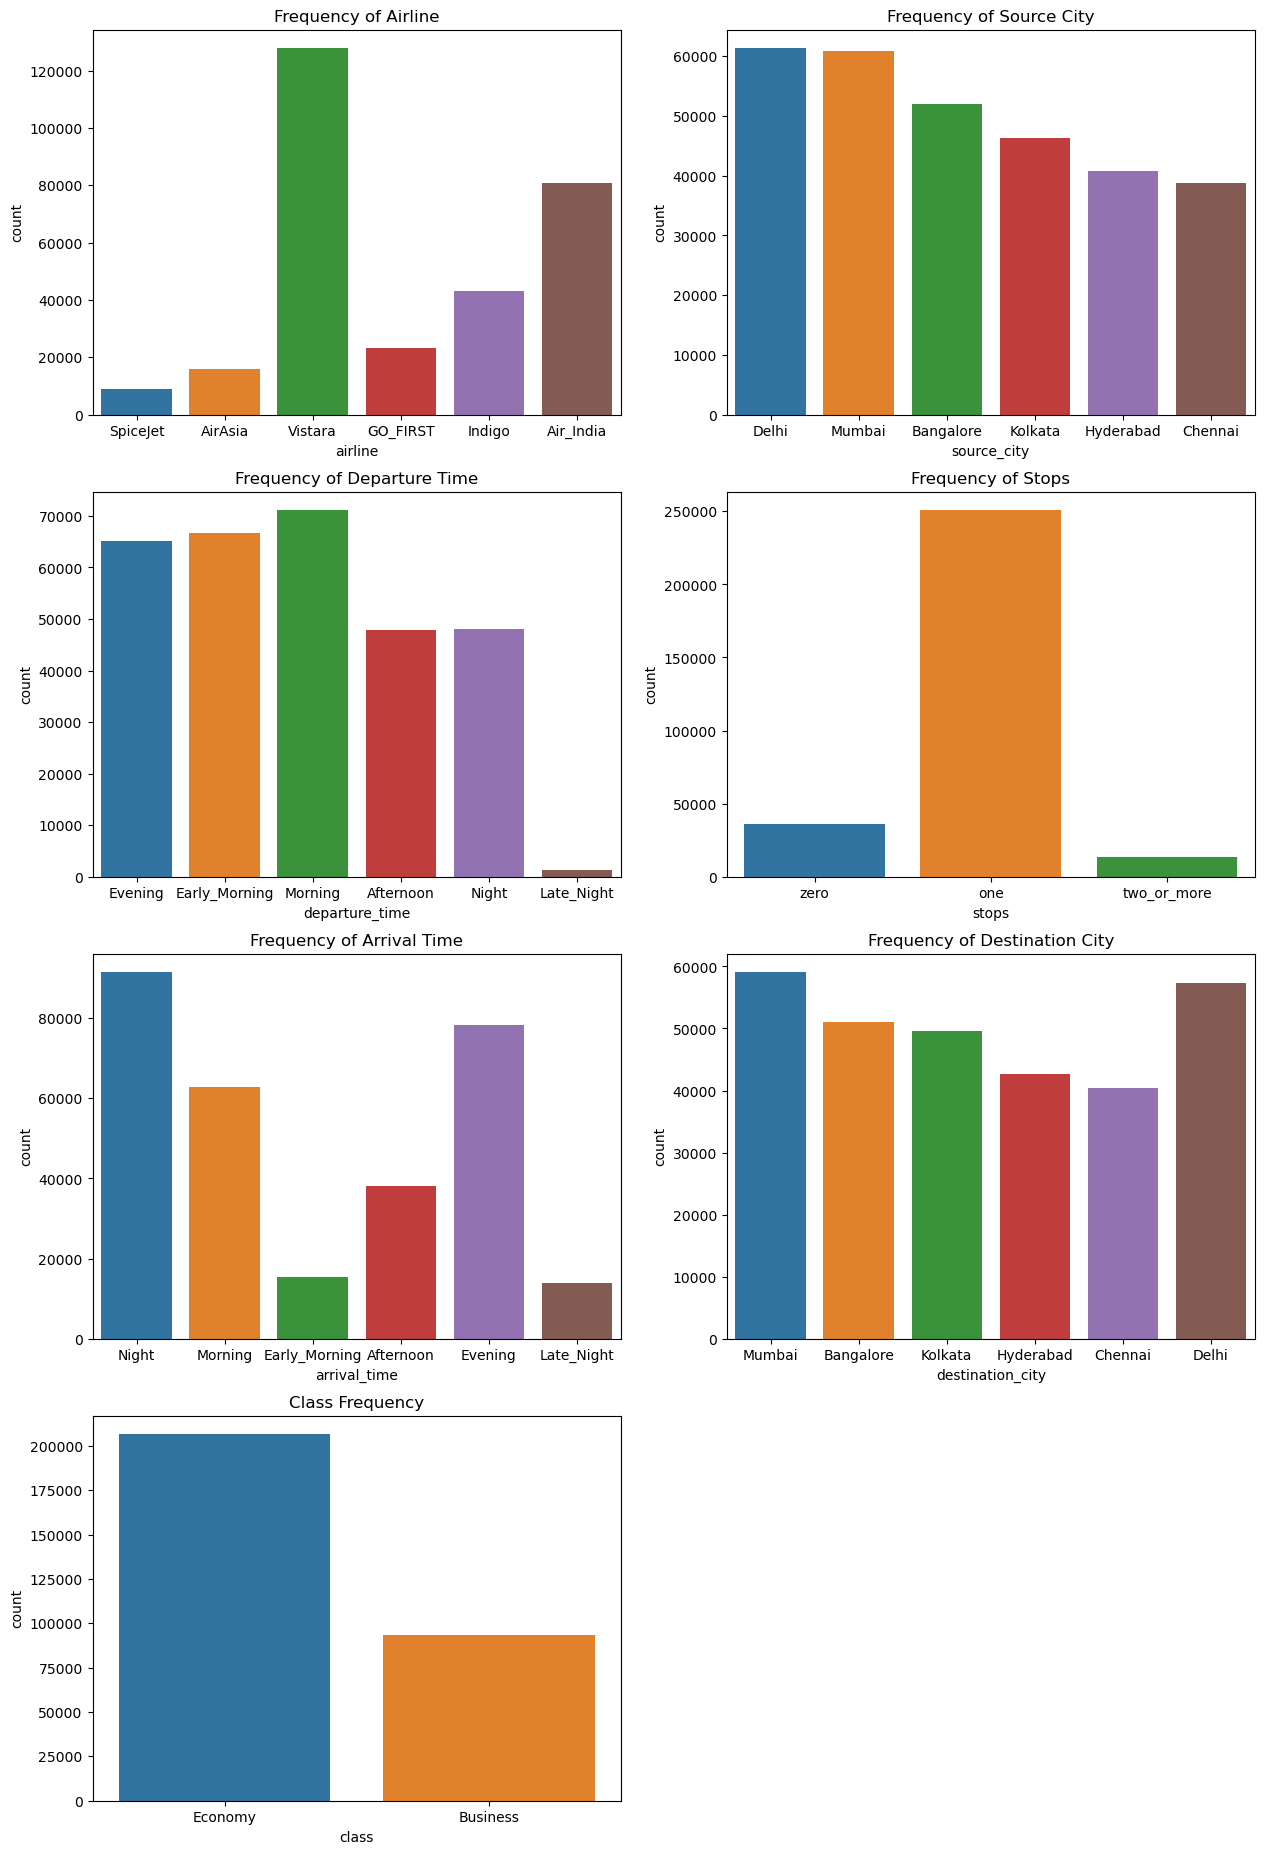

In [14]:
plt.figure(figsize = (15,23))

plt.subplot(4, 2, 1)
sns.countplot(x = df["airline"], data = df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x = df["source_city"], data = df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x = df["departure_time"], data = df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x = df["stops"], data = df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x = df["arrival_time"], data = df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x = df["destination_city"], data = df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x = df["class"], data = df)
plt.title("Class Frequency")

plt.show()

## Label Encoding

### Performing One Hot Encoding for categorical features of a dataframe

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df["airline"] = le.fit_transform(df["airline"])
df["source_city"] = le.fit_transform(df["source_city"])
df["departure_time"] = le.fit_transform(df["departure_time"])
df["stops"] = le.fit_transform(df["stops"])
df["arrival_time"] = le.fit_transform(df["arrival_time"])
df["destination_city"] = le.fit_transform(df["destination_city"])
df["class"] = le.fit_transform(df["class"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


## Feature Selection

### Plotting correlation graph to see the correlation between features and dependent variable.

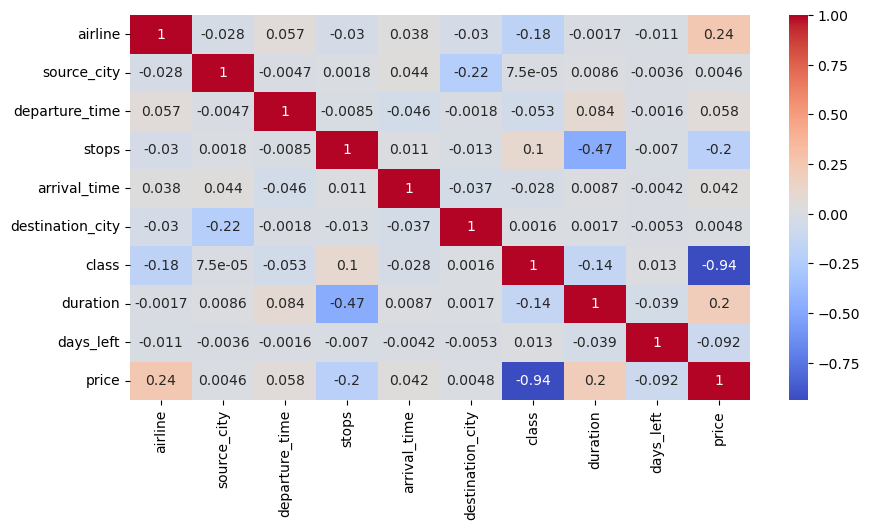

In [17]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

### Selecting the features using VIF. VIF should be less than 5, so drop the stops feature.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


### Dropping the stops column. All features are having VIF less than 5.

In [19]:
df = df.drop(columns = ["stops"])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [20]:
df.dtypes

airline               int32
flight               object
source_city           int32
departure_time        int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have a pandas DataFrame named 'df' with the 'AI-424' column containing non-numeric data.
# Step 1: Identify the column containing non-numeric values
non_numeric_column = 'flight'

# Step 2: Convert non-numeric data to numeric (example using label encoding)
df[non_numeric_column] = df[non_numeric_column].astype('category').cat.codes

# Step 3: Drop the column if not relevant
# df.drop(columns=[non_numeric_column], inplace=True)




# Linear Regression

### Applying standardization and implementing Linear Regression Model to predict the price of a flight.

In [22]:
X = df.drop(columns = ["price"])
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Actual_Value", "Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4655.366536
1,64831.0,51715.904941
2,6195.0,6637.137337
3,60160.0,55490.673689
4,6578.0,5129.608973
...,...,...
60026,5026.0,4955.972392
60027,3001.0,4530.048167
60028,6734.0,4969.926359
60029,5082.0,2548.053788


### Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) of the Linear regression model is 7259.93 and Mean absolute percentage error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test , y_pred)
mean_abs_error

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

7259.236751432341

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


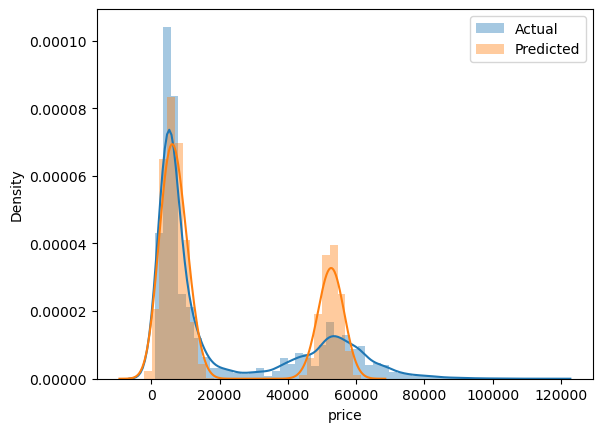

In [28]:
# plotting the graph of actual & predicted price of flight

sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred, label = "Predicted")
plt.legend()

# Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

r2_score(y_test, y_pred)
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

3005.140581446994

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

r2_score(y_test, y_pred)

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error